In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Modelos de regresión

### Regresión lineal

Desarrolla un modelo que ajusta las muestras usando una recta. Matemáticamente, la regresión lineal se representa mediante la ecuación 

$$y = wx + b$$

Los híper-parámetros aquí son (w,b). La pendiente está determinada por w, minetras que b establece el desplazamiento (offset): distancia vertical al eje x.

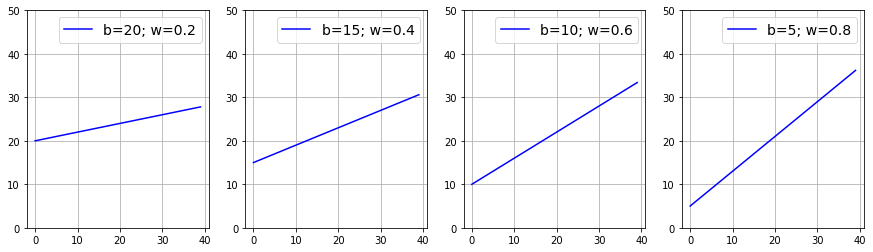

In [4]:
fig, axs = plt.subplots(1,4, figsize=(15,4))
X = np.array(range(40))

for fig,b,w in zip([0,1,2,3], [20,15,10,5], [0.2,0.4,0.6,0.8]):
    y = b + w*X
    axs[fig].plot(X,y, 'b-', label = 'b=' + format(b)+'; w='+format(w))
    axs[fig].set_ylim(bottom=0, top=50),axs[fig].legend();
    axs[fig].legend(prop={'size':14}); axs[fig].grid()
plt.show()

La regresión lineal se puede llevar a cabo usando diferentes métodos. En esta ocasión vamos a usar el conocido método del gradiente descendente. Este algoritmo busca un mínimo en el híper-espacio de errores; esto es: Busca los errores más bajos que le sea posible encontrar

In [5]:
import random

**gradient_regression** implementan las ecuaciones (2) y (3)
$$  \text{loss(w,b)} = \frac{1}{N} \sum_{i=1}^{n}{(y_{i} - b - wx_{i})^2}$$
$$   \frac{\partial loss(w,b)}{\partial b} = -2\frac{1}{N} \sum_{i=1}^{n}{(y_{i} - b - wx_{i})}$$
$$   \frac{\partial loss(w,b)}{\partial w} = -2\frac{1}{N} \sum_{i=1}^{n}{x_i(y_{i} - b - wx_{i})}$$

En la función también se utiliza el parametro **$\alpha$** que sirve para determinar el tamaño de los pasos realizados para alcanzar el mínimo en la función de error, si **$\alpha$** es muy pequeño, el algoritmo necesitará demasiado tiempo para alcanzar el mínimo; si **$\alpha$** es demasiado grande, podría pararse el mínimo y oscilar alrededor.

In [20]:
def gradient_regression(X, y, alpha, b, w):
    dw = 0.0; db = 0.0
    
    for i in range(len(X)):
        aux = -2.0*(y[i] - (w*X[i] + b))
        db = db + aux
        dw = dw = X[i]*aux
    aux = 1.0/float(len(X))
    b = b - aux*db*alpha
    w = w - aux*dw*alpha
    return b,w


def gradient_regression2(X, y, alpha, b, w):
    aux = -2*(y - (w*X + b)).sum()
    b = b - aux*alpha*float(len(X))
    w = w - aux*alpha*float(len(X))
    return b,w

La función del modelo muestra el concepto de **epoch**, cada **epoch** se corresponde con el proceso de todas las muestras de datos

In [21]:
def plot(fig, X, y, b, w, epochs):
    axs[fig].plot(X, y, 'yo', label = 'Samples')
    X = np.array(X)
    axs[fig].plot(X, w*X+b, 'k-', label= 'Regrression loss: '+'{:9.2f}'.format(loss(X,y,b,w)))
    axs[fig].set_xlabel('{:5.0f}'.format(epochs) + ' epochs')
    axs[fig].legend(); axs[fig].grid();
    return

def model(X, y, alpha, b, w, epochs):
    fig = 0
    for e in range(epochs):
        b, w = gradient_regression(X, y, alpha, b, w)
        if e % 3000 == 0:
            plot(fig, X, y, b, w, e)
            fig +=1
    return b,w;

La función prediction devuelve la predicción para **y** procesando el modelo(b,w)

La función **loss** devuelve las diferencias cuadráticas medias como una mediad de calidad del modelo obtenido aplicado a las muestras correspondiente.

In [23]:
def prediction(x, b, w):
    return(x*w+b)

def loss(X, y, b, w):
    sum = 0
    for i in range(len(X)):
        sum +=(y[i]-prediction(X[i], b, w))** 2
    return sum/len(X)

def create_samples(n):
    y = []; X = list(range(40))
    for i in range(len(X)):
        y.append(20 + X[i]+ random.random()*20)
    return X,y

def create_samples2(n):
    x = np.array(list(range(40)))
    y = 20+X+np.random.rand(40)*20
    return X,y


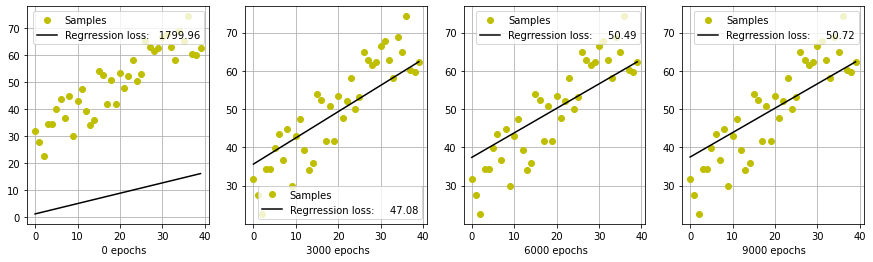

In [24]:
X,y = create_samples2(40)

EPOCHS = 9001;

fig, axs = plt.subplots(1,4, figsize=(15,4))
b, w = model(X, y, 0.001, random.random(), random.random(), EPOCHS)

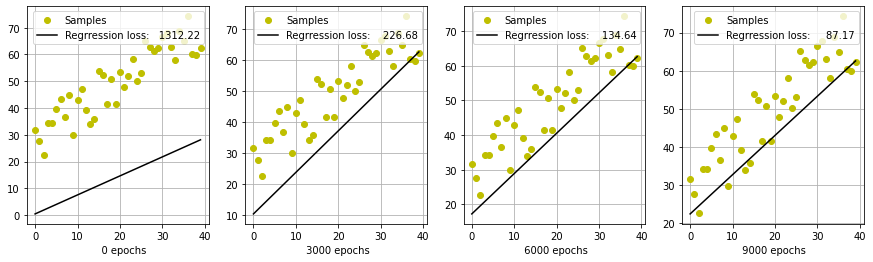

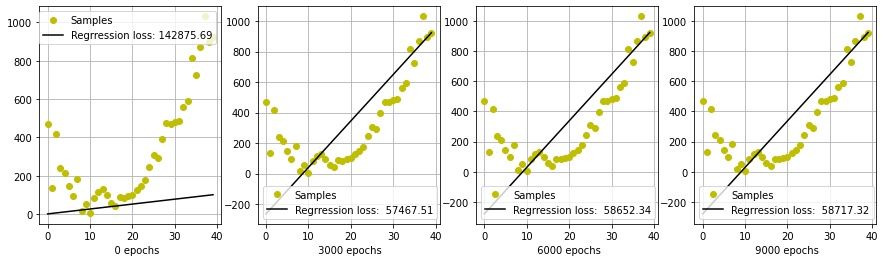

43.86097076204513
50.23963677953987


In [25]:
fig, axs = plt.subplots(1,4, figsize=(15,4))
model(X, y, 0.0001, random.random(), random.random(), EPOCHS)
y = []

for i in range(len(X)):
    y.append((X[i]-10)**2 + random.random()*20*abs(len(X)/2-i))
    
fig, axs = plt.subplots(1,4, figsize=(15,4))
model(X, y, 0.001, random.random(), random.random(), EPOCHS)

plt.show()
print(prediction(10, b, w))
print(prediction(20, b, w))

Como se puede observar, b y w, tienen un valor que nos sirve para predecir ingresando cualquier x

### Ahora utilizaremos la libería scikit-learn

In [27]:
from sklearn import linear_model

In [28]:
n_samples = 50
X = np.zeros((n_samples,2))
y = np.zeros((n_samples,2))

X[:,0] = np.array(list(range(n_samples)))
y[:,0] = 5+X[:,0]+ np.random.rand(n_samples)*20

1.032132241058359
12.685759118817042


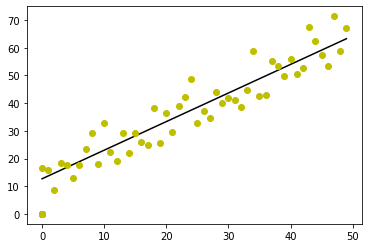

In [29]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X,y) #entrena el modelo

w = linear_regression.coef_
b = linear_regression.intercept_
print(w[0][0])
print(b[0])

'''
y_predict = []
for i in range(len(X)):
    y_predict.append(X[i,0]*w[0]+b)
'''
y_predict = linear_regression.predict(X)

plt.plot(X, y_predict, 'k-')
plt.plot(X, y, 'yo')
plt.show()

In [30]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

(442, 10)
(442,)
(442, 1)


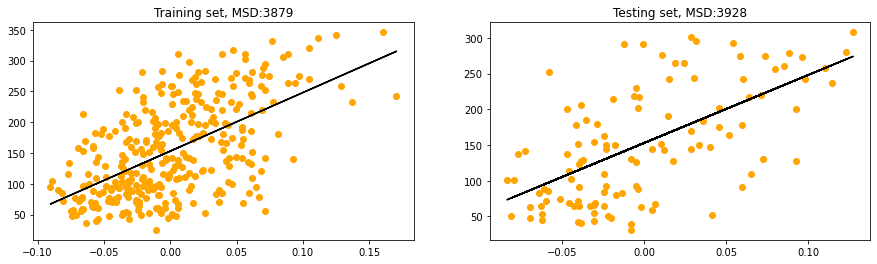

In [34]:
# Cargar conjunto de datos
diabetes = datasets.load_diabetes()


y = diabetes.target
X = diabetes.data[:, np.newaxis,2]
print(diabetes.data.shape)
print(diabetes.data[:,2].shape)
print(diabetes.data[:,np.newaxis,2].shape)

#Crea los cuatro conjuntos para llevar a cabo la validación cruzada partiendo de los datos X y del objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

#Crear y entrenar el modelo
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test)

train_MSD = mean_squared_error(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)

fig,axs = plt.subplots(1,2, figsize=(15,4))
axs[0].scatter(X_train, y_train, color='orange')
axs[0].plot(X_train, y_train_predicted, color='black')
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test, y_test, color='orange')
axs[1].plot(X_test, y_test_predicted, color='black')
axs[1].set_title('Testing set, MSD:{:.0f}'.format(test_MSD))

plt.show()

In [35]:
-> page 58

SyntaxError: invalid syntax (<ipython-input-35-424a01679c02>, line 1)